Using TensorFlow backend.


Epoch 1/20
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1767
Epoch 2/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0363
Epoch 3/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0349
Epoch 4/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0349
Epoch 5/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0318
Epoch 6/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0266
Epoch 7/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0250
Epoch 8/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0277
Epoch 9/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0270
Epoch 10/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0280
Epoch 11/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0253
Epoch 12/20
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0260
E

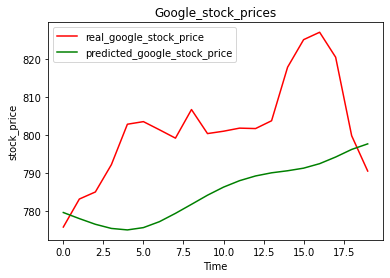

In [ ]:

import pandas as pd
 
import numpy as np 

import matplotlib.pyplot as plt

import keras


data = pd.read_csv('/content/Google_Stock_Price_Train.csv')
len(data)

train_data = data.iloc[:,[3]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_data = sc.fit_transform(train_data)


X_train = []
y_train = []
# creating timestamp for predicting new results
for i in range(60,len(data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

# keras way to reshape the input
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


from keras.models import Sequential  
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units =1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=20,batch_size=30)



data_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')

data_test = data_test.iloc[:,[3]]




dataset_total = pd.concat((data['Low'], data_test['Low']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


plt.plot(data_test,color = 'red',label = 'real_google_stock_price')
plt.plot(predicted_stock_price,color = 'green',label = 'predicted_google_stock_price')
plt.title('Google_stock_prices')
plt.xlabel('Time')
plt.ylabel('stock_price')
plt.legend()
plt.show()

In [ ]:

data = pd.read_csv('/content/Google_Stock_Price_Train.csv')
print(data.head())

train_data = data.iloc[:,[3]]
print(train_data.shape)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_data = sc.fit_transform(train_data)

X_train = []
y_train = []

# creating timestamp for predicting new results
for i in range(60,len(data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    

X_train = np.array(X_train)
y_train = np.array(y_train)

# keras way to reshape the input
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

print(X_train.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 1)
(1198, 60, 1)


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/bbc_news_mixed.csv')

label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

lemma = WordNetLemmatizer()
corpus = []

for sentence in range(len(data['text'])):
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', data['text'][sentence])        
    sentence = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    text = word_tokenize(sentence)
    text = [lemma.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = [val for val in text if len(val) > 2]
    text = " ".join(text)
    corpus.append(text)
    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF = TfidfVectorizer(max_features = 5000)

vectors = TF.fit_transform(corpus).toarray()

In [ ]:
x = pd.DataFrame(vectors)

In [ ]:
x.to_sparse

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.062662,0.0,0.036507,0.059519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.068930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047257,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.024894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021334,0.0,0.0,0.0,0.048561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.040934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032501,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.047909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016602,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import files
import pandas as pd

data_to_load = files.upload()

Saving bbc_news_mixed.csv to bbc_news_mixed (2).csv


In [ ]:

import pandas as pd
import numpy as np
import re
bbc_news = pd.read_csv('/content/bbc_news_mixed.csv')

from gensim.utils import simple_preprocess


preprocessed_bbc = bbc_news.text.apply(lambda x: simple_preprocess(x))
preprocessed_bbc

0       [cairn, shares, slump, on, oil, setback, share...
1       [egypt, to, sell, off, state, owned, bank, the...
2       [cairn, shares, up, on, new, oil, find, shares...
3       [low, cost, airlines, hit, eurotunnel, channel...
4       [parmalat, to, return, to, stockmarket, parmal...
                              ...                        
2220    [anti, spam, laws, bite, spammer, hard, the, n...
2221    [china, net, cafe, culture, crackdown, chinese...
2222    [halo, heralds, traffic, explosion, the, growi...
2223    [games, deserve, place, in, class, computer, g...
2224    [latest, opera, browser, gets, vocal, net, bro...
Name: text, Length: 2225, dtype: object

In [ ]:

from gensim.models import Word2Vec
w2v_model = Word2Vec(preprocessed_bbc, size=300, min_count=2, sg=1)

print('vocabulary size:', len(w2v_model.wv.vocab))

list(w2v_model.wv.vocab.items())[:20]


vocabulary size: 18588


[('cairn', <gensim.models.keyedvectors.Vocab at 0x7f1b3cffd828>),
 ('shares', <gensim.models.keyedvectors.Vocab at 0x7f1b3cffd898>),
 ('slump', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bb00>),
 ('on', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bd30>),
 ('oil', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bd68>),
 ('setback', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bda0>),
 ('in', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3be48>),
 ('energy', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3b898>),
 ('uk', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bc50>),
 ('firm', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bc88>),
 ('have', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bb38>),
 ('closed', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bcf8>),
 ('down', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bcc0>),
 ('after', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bba8>),
 ('disappointing', <gensim.models.keyedvectors.Vocab at 0x7f1b16f3bbe0>),
 ('drilling

In [ ]:
words_oil = w2v_model.wv.most_similar('oil')
print(words_oil)

words_pc = w2v_model.wv.most_similar('pc')
print(words_pc)

words_music = w2v_model.wv.most_similar('music')
words_football = w2v_model.wv.most_similar('football')
words = words_oil + words_music + words_football
words = list(map(lambda x: x[0], words))
words

[('gas', 0.8829200267791748), ('fuel', 0.8333015441894531), ('energy', 0.820343554019928), ('giant', 0.8054807186126709), ('telecoms', 0.7947431802749634), ('production', 0.7943171262741089), ('prices', 0.7912511825561523), ('unit', 0.7846218347549438), ('steel', 0.7807000279426575), ('rising', 0.7761669158935547)]
[('machine', 0.8804290294647217), ('desktop', 0.8491356372833252), ('storage', 0.8345295786857605), ('computer', 0.8342865705490112), ('elements', 0.8310246467590332), ('device', 0.8288513422012329), ('hardware', 0.827344536781311), ('graphics', 0.8239747881889343), ('handset', 0.8236008286476135), ('computing', 0.8161958456039429)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['gas',
 'fuel',
 'energy',
 'giant',
 'telecoms',
 'production',
 'prices',
 'unit',
 'steel',
 'rising',
 'video',
 'digital',
 'gaming',
 'movies',
 'recorders',
 'screen',
 'interactive',
 'audio',
 'portable',
 'sound',
 'rugby',
 'scottish',
 'premier',
 'spirit',
 'lions',
 'league',
 'representatives',
 'english',
 'leaders',
 'representative']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


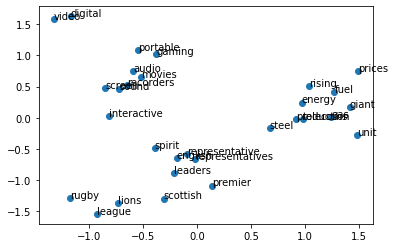

<Figure size 432x1080 with 0 Axes>

In [ ]:
from matplotlib import pyplot
from sklearn.decomposition import PCA


def plot_w2v(word_list):
    X = w2v_model[word_list]
   
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    
    pyplot.figure(figsize=(6,15))
    pyplot.show()

plot_w2v(words)

In [ ]:
def get_embedding_w2v(doc_tokens):
    embeddings = []
    
    model = w2v_model
      
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
    
    return np.mean(embeddings, axis=0)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = preprocessed_bbc.apply(lambda x: get_embedding_w2v(x))
X = pd.DataFrame(X.to_list())

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(bbc_news.label)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =0)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_test,y_predict))

print(accuracy_score(y_test,y_predict))

print(classification_report(y_test,y_predict))

[[ 99   0   8   0   4]
 [  2  61   5   4   2]
 [  6   0  73   3   4]
 [  0   4   3 101   0]
 [  2   1   3   0  60]]
0.8853932584269663
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       111
           1       0.92      0.82      0.87        74
           2       0.79      0.85      0.82        86
           3       0.94      0.94      0.94       108
           4       0.86      0.91      0.88        66

    accuracy                           0.89       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.89      0.89      0.89       445

